# Atendimentos AS Bento Gonçalves 2023 (A)

## Importando e Tratando Base Feegow

In [1]:
import pandas as pd

# Importando a base de tempo de espera pré-tratativa CX
df_a_completo = pd.read_csv('/home/lucasmateus/dbt-projects/projetos_lucas/cx/tempo_medio_espera/as bento goncalves/tempo_espera_atendimento_bento_goncalves_2023.csv')

In [2]:
# Filter data from July 1st onwards (inclusive)
df_a_completo['dt_agendamento'] = df_a_completo['dt_agendamento'].str.strip("'")
df_a_completo['dt_agendamento'] = pd.to_datetime(df_a_completo['dt_agendamento'], format='%Y-%m-%d')
df_a_completo = df_a_completo[df_a_completo['dt_agendamento'] >= '2023-07-01']
df_a_completo.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo
0,869006512,2023-12-29,19772,AmorSaúde Bento Gonçalves,Bryan De Azeredo Da Silva,10:33:37.000,Atendido,3,Clinica Médica,3,NaN


In [3]:
df_a_completo.dtypes

id_agendamento               int64
dt_agendamento      datetime64[ns]
id_unidade                   int64
unidade                     object
nm_profissional             object
hora                        object
nome_status                 object
status_id                    int64
nm_especialidade            object
fila_status                  int64
duracao_tempo               object
dtype: object

In [4]:
df_a = df_a_completo.dropna(subset=['duracao_tempo'])

In [5]:
df_a.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo
1,869006512,2023-12-29,19772,AmorSaúde Bento Gonçalves,Bryan De Azeredo Da Silva,10:16:20.000,Em atendimento,2,Clinica Médica,2,0 00:17:17.000


In [6]:
# Function to convert time duration string to seconds
def time_str_to_seconds(time_str):
    # Check if the value starts with a hyphen ("-")
    if time_str.startswith('-'):
        return None  # Return None for negative values
    # Check if there is an extra leading zero
    elif time_str.startswith('0 '):
        # Remove the extra leading zero if present
        time_str = time_str[2:]  # Remove the extra leading zero
    
    # Remove milliseconds from the time string
    time_str = time_str.split('.')[0]
    
    # Split the time string into hours, minutes, and seconds
    parts = time_str.split(':')
    
    # Convert the parts to integers
    hours, minutes, seconds = map(int, parts)
    
    # Calculate the total seconds
    total_seconds = hours * 3600 + minutes * 60 + seconds
    
    return total_seconds

# Convert the duracao_tempo column to seconds
df_a['duracao_tempo_seconds'] = df_a['duracao_tempo'].apply(time_str_to_seconds)

# Drop rows with negative values
df_a = df_a.dropna(subset=['duracao_tempo_seconds'])


/tmp/ipykernel_725979/568554916.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['duracao_tempo_seconds'] = df_a['duracao_tempo'].apply(time_str_to_seconds)


In [7]:
# Create a new column duracao_tempo_minutes by dividing duracao_tempo_seconds by 60
df_a['duracao_tempo_minutes'] = df_a['duracao_tempo_seconds'] / 60

/tmp/ipykernel_725979/3280060836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['duracao_tempo_minutes'] = df_a['duracao_tempo_seconds'] / 60


In [8]:
df_a.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo,duracao_tempo_seconds,duracao_tempo_minutes
1,869006512,2023-12-29,19772,AmorSaúde Bento Gonçalves,Bryan De Azeredo Da Silva,10:16:20.000,Em atendimento,2,Clinica Médica,2,0 00:17:17.000,1037.0,17.283333


In [9]:
# Filter rows where status_id is 4 (for waiting)
df_a_espera = df_a[df_a['status_id'] == 4]

# Filter rows where status_id is 2 (for service)
df_a_atendimento = df_a[df_a['status_id'] == 2]

In [10]:
df_a_espera.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo,duracao_tempo_seconds,duracao_tempo_minutes
2,869006512,2023-12-29,19772,AmorSaúde Bento Gonçalves,Bryan De Azeredo Da Silva,09:46:58.000,Aguardando,4,Clinica Médica,1,0 00:29:22.000,1762.0,29.366667


In [11]:
df_a_atendimento.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo,duracao_tempo_seconds,duracao_tempo_minutes
1,869006512,2023-12-29,19772,AmorSaúde Bento Gonçalves,Bryan De Azeredo Da Silva,10:16:20.000,Em atendimento,2,Clinica Médica,2,0 00:17:17.000,1037.0,17.283333


## Análise Exploratória do Tempo de Espera

In [12]:
# Importanto bibliotecas gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set(style="white")
sns.despine(top=True, right=True, left=True, bottom=True)

<Figure size 640x480 with 0 Axes>

In [13]:
# Descriptive analysis and boxplot for df_a_espera
print("Descriptive statistics for df_a_espera:")
descriptive_stats_espera = df_a_espera['duracao_tempo_minutes'].describe().round().astype(int)
print(descriptive_stats_espera)


Descriptive statistics for df_a_espera:
count    8619
mean       24
std        25
min         0
25%         6
50%        17
75%        35
max       288
Name: duracao_tempo_minutes, dtype: int64


In [14]:
print("\nDescriptive statistics for df_a_espera:")
descriptive_stats_espera = df_a_espera['duracao_tempo_minutes'].describe().round(1)#.astype(int)

# Convert Series to DataFrame
descriptive_stats_df = descriptive_stats_espera.to_frame().reset_index()

# Optional: Rename columns for clarity
descriptive_stats_df.columns = ['Statistic', 'Value']

descriptive_stats_df


Descriptive statistics for df_a_espera:


,Statistic,Value
0,count,8619.0
1,mean,24.3
2,std,25.1
3,min,0.1
4,25%,6.2
5,50%,17.2
6,75%,35.0
7,max,288.2


In [16]:
# Descriptive analysis segmented by nm_especialidade for df_a_espera
print("\nDescriptive statistics for df_a_espera segmented by nm_especialidade:")
descriptive_stats_espera_segmented = df_a_espera.groupby('nm_especialidade')['duracao_tempo_minutes'].describe().round().astype(int)


# Sort by the median (50th percentile)
descriptive_stats_espera_segmented_sorted = descriptive_stats_espera_segmented.sort_values(by='50%', ascending=True)
descriptive_stats_espera_segmented_sorted


Descriptive statistics for df_a_espera segmented by nm_especialidade:


,count,mean,std,min,25%,50%,75%,max
nm_especialidade,,,,,,,,
Nutrição,268,10,13,0,1,4,18,58
Gastroenterologia,22,10,8,0,6,8,15,31
Dermatologia,399,12,12,0,2,9,17,81
Psicologia,1923,14,16,0,3,9,19,234
Cardiologia,293,16,16,0,5,11,19,101
Ginecologia e Obstetrícia,797,19,20,0,6,13,27,142
Psiquiatria,770,24,25,0,6,18,35,267
Ortopedia e Traumatologia,677,23,19,0,9,19,33,104
Cirurgia Geral,15,25,22,1,6,22,35,69


## Análise Exploratória do Tempo de Atendimento

In [17]:
# Descriptive analysis and boxplot for df_a_atendimento
print("\nDescriptive statistics for df_a_atendimento:")
descriptive_stats_atendimento = df_a_atendimento['duracao_tempo_minutes'].describe().round(1)#.astype(int)
print(descriptive_stats_atendimento)


Descriptive statistics for df_a_atendimento:
count    8694.0
mean       16.4
std        14.6
min         0.0
25%         8.3
50%        13.2
75%        23.0
max       518.1
Name: duracao_tempo_minutes, dtype: float64


In [18]:
print("\nDescriptive statistics for df_a_atendimento:")
descriptive_stats_atendimento = df_a_atendimento['duracao_tempo_minutes'].describe().round().astype(int)

# Convert Series to DataFrame
descriptive_stats_df = descriptive_stats_atendimento.to_frame().reset_index()

# Optional: Rename columns for clarity
descriptive_stats_df.columns = ['Statistic', 'Value']

descriptive_stats_df


Descriptive statistics for df_a_atendimento:


,Statistic,Value
0,count,8694
1,mean,16
2,std,15
3,min,0
4,25%,8
5,50%,13
6,75%,23
7,max,518


In [20]:
# Descriptive analysis segmented by nm_especialidade for df_a_atendimento
print("\nDescriptive statistics for df_a_atendimento segmented by nm_especialidade:")
descriptive_stats_atendimento_segmented = df_a_atendimento.groupby('nm_especialidade')['duracao_tempo_minutes'].describe().round().astype(int)

# Sort by the median (50th percentile)
descriptive_stats_atendimento_segmented_sorted = descriptive_stats_atendimento_segmented.sort_values(by='50%', ascending=True)
descriptive_stats_atendimento_segmented_sorted


Descriptive statistics for df_a_atendimento segmented by nm_especialidade:


,count,mean,std,min,25%,50%,75%,max
nm_especialidade,,,,,,,,
Otorrinolaringologia,108,5,2,1,3,4,6,11
Oftalmologia,527,12,13,0,5,7,12,108
Cardiologia,300,9,5,0,6,8,11,43
Urologia,11,8,5,0,6,8,9,19
Dermatologia,402,11,24,0,7,9,12,475
Gastroenterologia,22,10,3,5,7,9,11,18
Ortopedia e Traumatologia,683,11,15,0,7,10,13,377
Cirurgia Geral,14,10,5,4,7,11,12,19
Clinica Médica,2284,13,14,0,8,11,15,289


# Atendimento AS Bento Gonçalves 2024 (B)

## Importando e Tratando Base Feegow

In [21]:
# Importing the CX pre-treatment waiting time database
df_b_completo = pd.read_csv('/home/lucasmateus/dbt-projects/projetos_lucas/cx/tempo_medio_espera/as bento goncalves/tempo_espera_atendimento_bento_goncalves_2024.csv')

In [22]:
df_b_completo.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo
0,877444167,'2024-03-30',19772,AmorSaúde Bento Gonçalves,Rinália Taís Benini,17:09:29.000,Atendido,3,Psicologia,3,NaN


In [23]:
df_b = df_b_completo.dropna(subset=['duracao_tempo'])

In [24]:
df_b.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo
1,877444167,'2024-03-30',19772,AmorSaúde Bento Gonçalves,Rinália Taís Benini,15:40:27.000,Em atendimento,2,Psicologia,2,0 01:29:02.000


In [25]:
# Convert the duracao_tempo column to seconds
df_b['duracao_tempo_seconds'] = df_b['duracao_tempo'].apply(time_str_to_seconds)

/tmp/ipykernel_725979/1189470043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['duracao_tempo_seconds'] = df_b['duracao_tempo'].apply(time_str_to_seconds)


In [26]:
# Drop rows with negative values
df_b = df_b.dropna(subset=['duracao_tempo_seconds'])

In [27]:
# Create a new column duracao_tempo_minutes by dividing duracao_tempo_seconds by 60
df_b['duracao_tempo_minutes'] = df_b['duracao_tempo_seconds'] / 60

/tmp/ipykernel_725979/56378167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['duracao_tempo_minutes'] = df_b['duracao_tempo_seconds'] / 60


In [28]:
df_b.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo,duracao_tempo_seconds,duracao_tempo_minutes
1,877444167,'2024-03-30',19772,AmorSaúde Bento Gonçalves,Rinália Taís Benini,15:40:27.000,Em atendimento,2,Psicologia,2,0 01:29:02.000,5342.0,89.033333


In [29]:
# Filter rows where status_id is 4 (for waiting)
df_b_espera = df_b[df_b['status_id'] == 4]

In [30]:
# Filter rows where status_id is 2 (for service)
df_b_atendimento = df_b[df_b['status_id'] == 2]


In [31]:
df_b_espera.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo,duracao_tempo_seconds,duracao_tempo_minutes
2,877444167,'2024-03-30',19772,AmorSaúde Bento Gonçalves,Rinália Taís Benini,15:36:37.000,Aguardando,4,Psicologia,1,0 00:03:50.000,230.0,3.833333


In [32]:
df_b_atendimento.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo,duracao_tempo_seconds,duracao_tempo_minutes
1,877444167,'2024-03-30',19772,AmorSaúde Bento Gonçalves,Rinália Taís Benini,15:40:27.000,Em atendimento,2,Psicologia,2,0 01:29:02.000,5342.0,89.033333


## Análise Exploratória do Tempo de Espera

In [33]:
# Descriptive analysis and boxplot for df_b_espera
print("Descriptive statistics for df_b_espera:")
descriptive_stats_espera = df_b_espera['duracao_tempo_minutes'].describe().round(1)#.astype(int)
print(descriptive_stats_espera)

Descriptive statistics for df_b_espera:
count    4319.0
mean       23.7
std        25.9
min         0.0
25%         5.8
50%        16.0
75%        34.1
max       428.5
Name: duracao_tempo_minutes, dtype: float64


In [34]:
print("\nDescriptive statistics for df_b_espera:")
descriptive_stats_espera = df_b_espera['duracao_tempo_minutes'].describe().round().astype(int)

# Convert Series to DataFrame
descriptive_stats_df = descriptive_stats_espera.to_frame().reset_index()

# Optional: Rename columns for clarity
descriptive_stats_df.columns = ['Statistic', 'Value']

descriptive_stats_df


Descriptive statistics for df_b_espera:


,Statistic,Value
0,count,4319
1,mean,24
2,std,26
3,min,0
4,25%,6
5,50%,16
6,75%,34
7,max,428


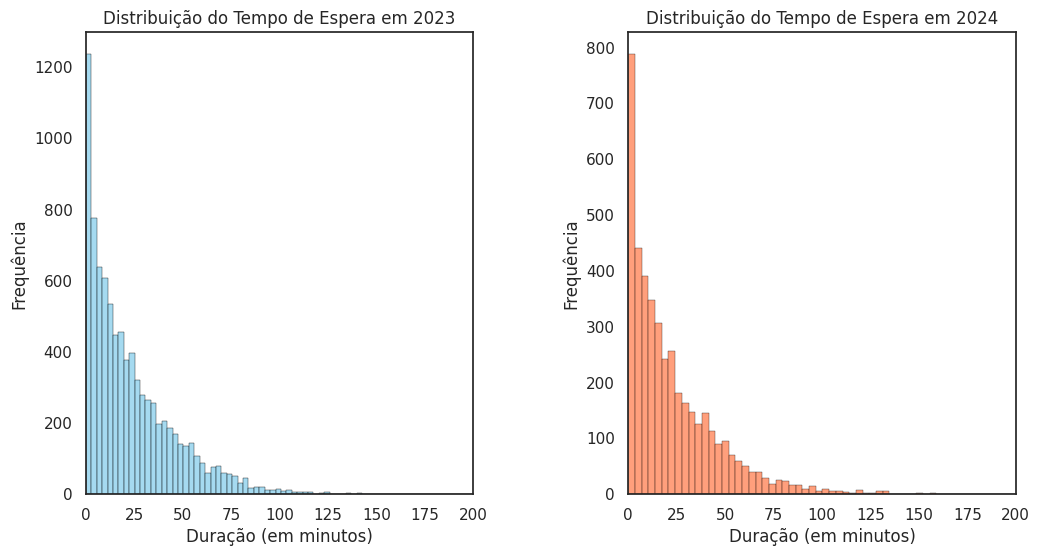

In [37]:
# Assuming your dataframes are named df_a_espera and df_b_espera

# Set the background style (optional)
plt.figure(figsize=(12, 6))  # Adjust figure size for side-by-side plots
sns.set_style("white")  # Optional: Set white background (no grid)

# Plot histograms side-by-side using subplots (similar to method 1 from previous response)
plt.subplot(1, 2, 1)  # First subplot for df_a_espera

sns.histplot(data=df_a_espera, x='duracao_tempo_minutes', color='skyblue', edgecolor='black')
plt.title('Distribuição do Tempo de Espera em 2023')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Frequência')
plt.xlim(0, 200)  # Adjust x-axis limits based on your data

# Remove gridlines (not needed with white style)
plt.grid(False)

plt.subplot(1, 2, 2)  # Second subplot for df_b_espera

sns.histplot(data=df_b_espera, x='duracao_tempo_minutes', color='coral', edgecolor='black')
plt.title('Distribuição do Tempo de Espera em 2024')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Frequência')
plt.xlim(0, 200)  # Adjust x-axis limits based on your data

# Optional: Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)  # Adjust spacing as needed

# Save the figure with a descriptive name
plt.savefig('histograma_espera_AB.png')  # Saves as PNG by default

plt.show()  # Optional: Display the plot before saving

In [38]:
# Descriptive analysis segmented by nm_especialidade for df_b_espera
print("\nDescriptive statistics for df_b_espera segmented by nm_especialidade:")
descriptive_stats_espera_segmented = df_b_espera.groupby('nm_especialidade')['duracao_tempo_minutes'].describe().round().astype(int)


# Sort by the median (50th percentile)
descriptive_stats_espera_segmented_sorted = descriptive_stats_espera_segmented.sort_values(by='50%', ascending=True)
descriptive_stats_espera_segmented_sorted


Descriptive statistics for df_b_espera segmented by nm_especialidade:


,count,mean,std,min,25%,50%,75%,max
nm_especialidade,,,,,,,,
Nutrição,114,10,14,0,1,3,16,67
Dermatologia,285,11,17,0,2,7,14,234
Ginecologia,3,5,3,1,4,7,7,7
Otorrinolaringologia,7,17,19,4,5,7,25,48
Pediatria,131,11,11,0,1,7,17,48
Psicologia,860,17,31,0,3,9,20,428
Ginecologia e Obstetrícia,313,17,17,0,6,11,24,107
Endocrinologia,160,22,24,0,7,13,26,114
Cardiologia,135,17,13,0,7,15,23,52


## Análise Exploratória Tempo de Atendimento

In [39]:
print("\nDescriptive statistics for df_b_atendimento:")
descriptive_stats_atendimento = df_b_atendimento['duracao_tempo_minutes'].describe().round().astype(int)
descriptive_stats_atendimento


Descriptive statistics for df_b_atendimento:


count    4361
mean       16
std        17
min         0
25%         8
50%        13
75%        22
max       593
Name: duracao_tempo_minutes, dtype: int64

In [40]:
print("\nDescriptive statistics for df_b_atendimento:")
descriptive_stats_atendimento = df_b_atendimento['duracao_tempo_minutes'].describe().round().astype(int)

# Convert Series to DataFrame
descriptive_stats_df = descriptive_stats_atendimento.to_frame().reset_index()

# Optional: Rename columns for clarity
descriptive_stats_df.columns = ['Statistic', 'Value']

descriptive_stats_df


Descriptive statistics for df_b_atendimento:


,Statistic,Value
0,count,4361
1,mean,16
2,std,17
3,min,0
4,25%,8
5,50%,13
6,75%,22
7,max,593


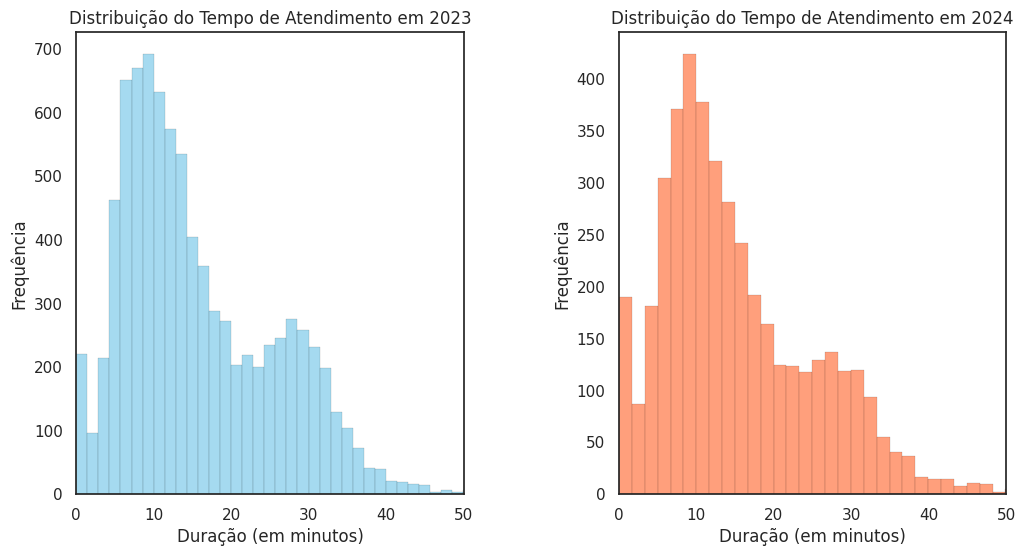

In [41]:
# Assuming your dataframes are named df_a_espera and df_b_espera

# Set the background style (optional)
plt.figure(figsize=(12, 6))  # Adjust figure size for side-by-side plots
sns.set_style("white")  # Optional: Set white background (no grid)

# Plot histograms side-by-side using subplots (similar to method 1 from previous response)
plt.subplot(1, 2, 1)  # First subplot for df_a_espera

sns.histplot(data=df_a_atendimento, x='duracao_tempo_minutes', color='skyblue', edgecolor='black')
plt.title('Distribuição do Tempo de Atendimento em 2023')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Frequência')
plt.xlim(0, 50)  # Adjust x-axis limits based on your data

# Remove gridlines (not needed with white style)
plt.grid(False)

plt.subplot(1, 2, 2)  # Second subplot for df_b_espera

sns.histplot(data=df_b_atendimento, x='duracao_tempo_minutes', color='coral', edgecolor='black')
plt.title('Distribuição do Tempo de Atendimento em 2024')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Frequência')
plt.xlim(0, 50)  # Adjust x-axis limits based on your data

# Optional: Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)  # Adjust spacing as needed

# Save the figure with a descriptive name
plt.savefig('histograma_atendimento_AB.png')  # Saves as PNG by default

plt.show()  # Optional: Display the plot before saving

In [42]:
# Descriptive analysis segmented by nm_especialidade for df_b_atendimento
print("\nDescriptive statistics for df_b_atendimento segmented by nm_especialidade:")
descriptive_stats_atendimento_segmented = df_b_atendimento.groupby('nm_especialidade')['duracao_tempo_minutes'].describe().round().astype(int)

# Sort by the median (50th percentile)
descriptive_stats_atendimento_segmented_sorted = descriptive_stats_atendimento_segmented.sort_values(by='50%', ascending=True)
descriptive_stats_atendimento_segmented_sorted


Descriptive statistics for df_b_atendimento segmented by nm_especialidade:


,count,mean,std,min,25%,50%,75%,max
nm_especialidade,,,,,,,,
Otorrinolaringologia,7,54,135,1,3,3,4,361
Cardiologia,135,8,3,0,5,7,10,20
Endocrinologia,166,9,7,0,4,7,10,37
Dermatologia,286,10,13,0,7,9,11,221
Ginecologia e Obstetrícia,316,12,6,0,8,11,15,48
Oftalmologia,47,13,7,1,9,11,15,34
Ortopedia e Traumatologia,380,13,16,0,4,11,18,252
Pediatria,131,11,7,0,7,11,14,36
Clinica Médica,1486,13,10,0,8,12,16,189


# Comparação Estatística das Medianas - Teste A/B

In [43]:
# import scipy
# from scipy import stats

# shapiro_wilk = scipy.stats.shapiro

# # Perform the Shapiro-Wilk test
# stat, p_value = shapiro_wilk(df_a_espera['duracao_tempo_minutes'])

# # Interpretation
# if p_value > 0.05:  # Adjust significance level as needed
#   print("The data appears to be normally distributed (Shapiro-Wilk test).")
# else:
#   print("The data appears to be non-normal (Shapiro-Wilk test).")

In [44]:
# # Perform the Shapiro-Wilk test
# stat, p_value = shapiro_wilk(df_b_espera['duracao_tempo_minutes'])

# # Interpretation
# if p_value > 0.05:  # Adjust significance level as needed
#   print("The data appears to be normally distributed (Shapiro-Wilk test).")
# else:
#   print("The data appears to be non-normal (Shapiro-Wilk test).")

In [45]:
# # Perform the Shapiro-Wilk test
# stat, p_value = shapiro_wilk(df_a_atendimento['duracao_tempo_minutes'])

# # Interpretation
# if p_value > 0.05:  # Adjust significance level as needed
#   print("The data appears to be normally distributed (Shapiro-Wilk test).")
# else:
#   print("The data appears to be non-normal (Shapiro-Wilk test).")

In [46]:
# # Perform the Shapiro-Wilk test
# stat, p_value = shapiro_wilk(df_b_atendimento['duracao_tempo_minutes'])

# # Interpretation
# if p_value > 0.05:  # Adjust significance level as needed
#   print("The data appears to be normally distributed (Shapiro-Wilk test).")
# else:
#   print("The data appears to be non-normal (Shapiro-Wilk test).")

In [47]:
# import scipy.stats as stats

# # Hypothesis testing: H0 - medians are similar, H1 - medians in df_b are higher

# # Compare espera (waiting time)
# espera_a_median = df_a_espera['duracao_tempo_minutes'].median()
# espera_b_median = df_b_espera['duracao_tempo_minutes'].median()
# u_espera, p_value_espera = stats.mannwhitneyu(df_a_espera['duracao_tempo_minutes'], df_b_espera['duracao_tempo_minutes'])

# # Compare atendimento (service time)
# atendimento_a_median = df_a_atendimento['duracao_tempo_minutes'].median()
# atendimento_b_median = df_b_atendimento['duracao_tempo_minutes'].median()
# u_atendimento, p_value_atendimento = stats.mannwhitneyu(df_a_atendimento['duracao_tempo_minutes'], df_b_atendimento['duracao_tempo_minutes'])

# # Interpret the results
# print("Espera:")
# if p_value_espera < 0.05:  # Adjust significance level as needed
#     print(f"There is a statistically significant difference (p-value = {p_value_espera:.4f})")
#     if espera_b_median > espera_a_median:
#         print(f"The median waiting time in df_b_espera ({espera_b_median:.2f} minutes) is higher than in df_a_espera ({espera_a_median:.2f} minutes).")
#     else:
#         print("The medians are not significantly different.")
# else:
#     print(f"There is no statistically significant difference in medians (p-value = {p_value_espera:.4f})")

# print("\nAtendimento:")
# if p_value_atendimento < 0.05:  # Adjust significance level as needed
#     print(f"There is a statistically significant difference (p-value = {p_value_atendimento:.4f})")
#     if atendimento_b_median > atendimento_a_median:
#         print(f"The median service time in df_b_atendimento ({atendimento_b_median:.2f} minutes) is higher than in df_a_atendimento ({atendimento_a_median:.2f} minutes).")
#     else:
#         print("The medians are not significantly different.")
# else:
#     print(f"There is no statistically significant difference in medians (p-value = {p_value_atendimento:.4f})")


In [48]:
# # Calculate the medians
# median_b_espera = df_b_espera['duracao_tempo_seconds'].median()
# median_a_espera = df_a_espera['duracao_tempo_seconds'].median()

# # Ensure average_waiting_time_a is positive to avoid division by zero
# if median_a_espera <= 0:
#   print("Median waiting time in df_a_espera cannot be zero or negative for percentage calculation.")
# else:
#   # Calculate percentage difference
#   percentage_difference = ((median_b_espera - median_a_espera) / median_a_espera) * 100

#   # Print the result with formatting
#   print(f"The median waiting time in df_b_espera is approximately {percentage_difference:.2f}% higher than in df_a_espera.")

In [49]:
# # Calculate the medians
# median_b_espera = df_b_espera['duracao_tempo_minutes'].median().round().astype(int)
# median_a_espera = df_a_espera['duracao_tempo_minutes'].median().round().astype(int)

# # Ensure average_waiting_time_a is positive to avoid division by zero
# if median_a_espera <= 0:
#   print("Median waiting time in df_a_espera cannot be zero or negative for percentage calculation.")
# else:
#   # Calculate percentage difference
#   percentage_difference = ((median_b_espera - median_a_espera) / median_a_espera) * 100

#   # Print the result with formatting
#   print(f"The median waiting time in df_b_espera is approximately {percentage_difference:.2f}% higher than in df_a_espera.")

In [50]:
# median_b_espera

In [51]:
# median_a_espera

In [52]:
# df_a_espera.to_excel('espera_a.xlsx', index=False, sheet_name='bd')
# df_a_atendimento.to_excel('atendimento_a.xlsx', index=False, sheet_name='bd')